<a href="https://colab.research.google.com/github/ArvinAz/Python/blob/main/HW11dataseta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. The Data within has 7 variables(or columns): statename, state abbrev, region, right to work, UMD2021, PovertyRate2022, and MHI2022. It has 7 datatypes variables, 3 string variables, 1 integer variable, 2 decimal variables, and 1 boolean value.
2. The data is Analyzing differences between Right to Work and non-Right to Work states. "Right to Work" (RTW) describes laws in state that require unions to represent people in a unionized workplace who are not members of the union. While this description alongside the name "Right to Work" may sound innocent, this dataset intends to compare certain statistics between RTW and non-RTW states. Namely, union membership, poverty rate, and median household income. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ArvinAz/Python/main/RightToWork.csv")
df.head()

,StateName,StateAbbrev,Region,RightToWork,UnionMemberDensity2021,PovertyRate2022,MedianHouseholdIncome2022
0,Alabama,AL,South,Yes,5.9,16.08,50536
1,Alaska,AK,West,No,15.8,10.67,77640
2,Arizona,AZ,West,Yes,5.4,13.66,58945
3,Arkansas,AR,South,Yes,3.9,16.31,47597
4,California,CA,West,No,15.9,12.98,75235


In [ ]:
df.isna().sum()

StateName                    0
StateAbbrev                  0
Region                       0
RightToWork                  0
UnionMemberDensity2021       0
PovertyRate2022              0
MedianHouseholdIncome2022    0
dtype: int64

In [ ]:
df.isnull().sum()

StateName                    0
StateAbbrev                  0
Region                       0
RightToWork                  0
UnionMemberDensity2021       0
PovertyRate2022              0
MedianHouseholdIncome2022    0
dtype: int64

In [ ]:
df.nunique()

StateName                    51
StateAbbrev                  51
Region                        4
RightToWork                   2
UnionMemberDensity2021       45
PovertyRate2022              50
MedianHouseholdIncome2022    51
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RightToWork                51 non-null     object 
 1   UnionMemberDensity2021     51 non-null     float64
 2   PovertyRate2022            51 non-null     object 
 3   MedianHouseholdIncome2022  51 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [ ]:
df.describe()

,UnionMemberDensity2021,PovertyRate2022,MedianHouseholdIncome2022
count,51.000000,51.000000,51.000000
mean,9.601961,12.492157,63212.490196
std,5.108757,2.765709,10997.175453
min,1.700000,7.160000,45081.000000
25%,5.400000,10.540000,55560.500000
50%,9.000000,12.250000,61439.000000
75%,12.750000,13.915000,71463.500000
max,22.400000,19.780000,92266.000000


In [ ]:
#Removing columns that seem unnecessary
df = df.drop(['Region',"StateAbbrev","StateName"],axis = 1)


#reset column_names so that 'name', which was taken out is not in there


#check the type of each feature
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RightToWork                51 non-null     object 
 1   UnionMemberDensity2021     51 non-null     float64
 2   PovertyRate2022            51 non-null     float64
 3   MedianHouseholdIncome2022  51 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB


Index(['RightToWork', 'UnionMemberDensity2021', 'PovertyRate2022',
       'MedianHouseholdIncome2022'],
      dtype='object')

In [ ]:
df.describe()

,UnionMemberDensity2021,PovertyRate2022,MedianHouseholdIncome2022
count,51.000000,51.000000,51.000000
mean,9.601961,12.492157,63212.490196
std,5.108757,2.765709,10997.175453
min,1.700000,7.160000,45081.000000
25%,5.400000,10.540000,55560.500000
50%,9.000000,12.250000,61439.000000
75%,12.750000,13.915000,71463.500000
max,22.400000,19.780000,92266.000000


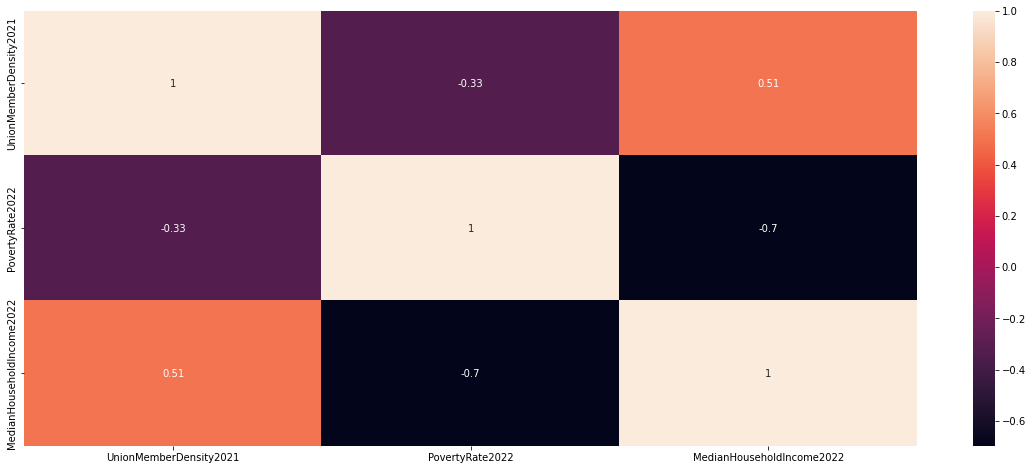

In [ ]:
#Using tables
corrMatrix = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb855140110>,
      dtype=object)

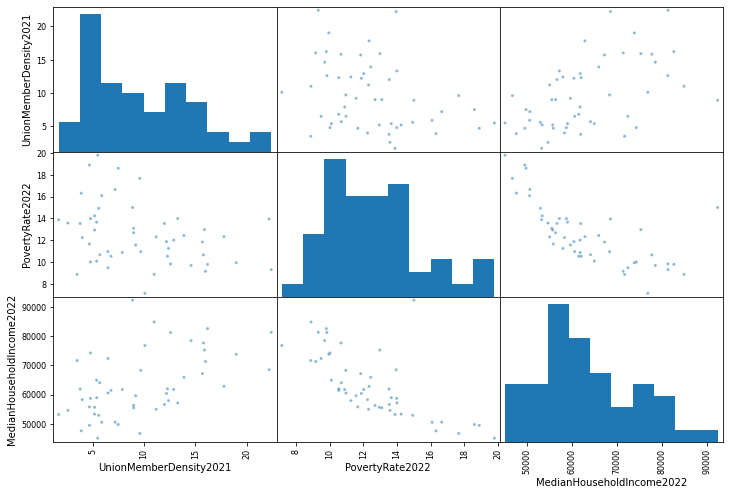

In [ ]:
 #let's now look at a few good attributes to compare
#we want to see if we are missing anything in a non-linear relationship
from pandas.plotting import scatter_matrix

attributes = ['UnionMemberDensity2021', 'PovertyRate2022',
       'MedianHouseholdIncome2022']
scatter_matrix(df[attributes], figsize=(12, 8))

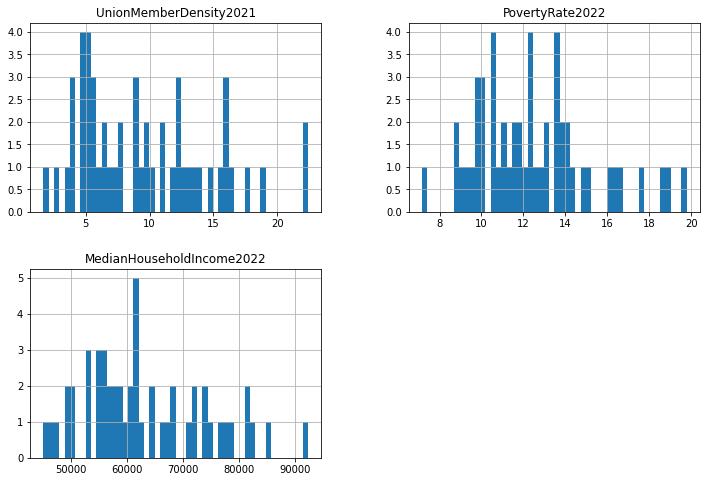

In [ ]:
#create a dataframe that just houses the numerical data
df_numerical = df.drop(['RightToWork'],axis = 1)

df_numerical.hist(bins=50, figsize=(12,8))
plt.show()

Yes    27
No     24
Name: RightToWork, dtype: int64


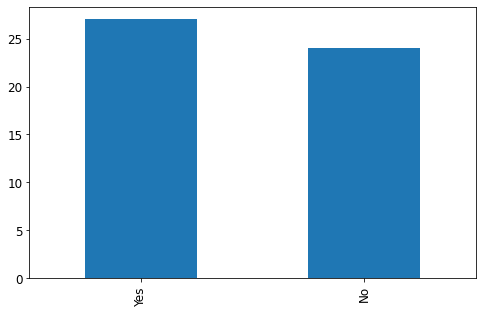

In [ ]:
print(df['RightToWork'].value_counts())
plt.figure(figsize=(8,5))
df['RightToWork'].value_counts().plot(kind='bar', fontsize = 12)

So in conclusion, this dataset is proficient at telling the where poverty is high where the union density and household median density is high. It really makes you think of how did this happen. For what I will do next, I will research into another dataset that catches my interest.